In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

df = pd.read_excel('projetoPy.xlsx')

nps = df['NPS']
P_inicial = df['Período de início']


In [ ]:
# horário em que ocorreu o maior NPS

#maximo
indice_maximo_nps = df['NPS'].idxmax()          # Período de início    2022-07-17 08:43:52
maximo_nps = df.loc[indice_maximo_nps]          # NPS                  71.3

#minimo
indice_minimo_nps = df['NPS'].idxmin()          # Período de início    2022-07-17 10:01:11
minimo_nps = df.loc[indice_minimo_nps]          # NPS                  19.5

In [ ]:
#  Média, Mediana e Moda

media = df['NPS'].mean()     # media 31.768368055555555
mediana = df['NPS'].median() # mediana 32.1
moda = df['NPS'].mode()[0]   # moda 34.7

Text(0.5, 1.0, 'Níveis de Pressão Sonora')

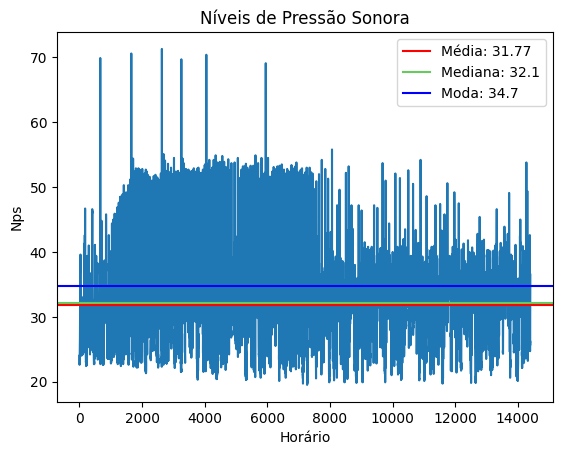

In [ ]:
# Grafico
plt.plot(nps)
plt.axhline(y=media, color='r', linestyle='-', label=f'Média: {media:.2f}')
plt.axhline(y=mediana, color='#67C95E', linestyle='-', label=f'Mediana: {mediana}')
plt.axhline(y=moda, color='b', linestyle='-', label=f'Moda: {moda}')
plt.legend()
plt.xlabel('Horário')
plt.ylabel('Nps')
plt.title('Níveis de Pressão Sonora')

In [ ]:
#A amplitude amostral

amplitude_amostral = maximo_nps[1] - minimo_nps[1] # 51.8

In [ ]:
# Número de classes usando a regra de Sturges

num_classes = math.ceil(1 + math.log2(len(df))) # Número de classes (usando regra de Sturges): 15

In [ ]:
#amplitude de cada classe
amplitude_classe = amplitude_amostral / num_classes

In [ ]:
#limites de classe
limites_classe = [minimo_nps[1] + i * amplitude_classe for i in range(num_classes + 1)]

# [
#   19.5,
#   22.953333333333333,
#   26.406666666666666,
#   29.86,
#   33.31333333333333,
#   36.766666666666666,
#   40.22,
#   43.67333333333333,
#   47.126666666666665,
#   50.58,
#   54.03333333333333,
#   57.486666666666665,
#   60.94,
#   64.39333333333333,
#   67.84666666666666,
#   71.3
# ]

In [ ]:
#Frequências absolutas das classes

frequencias_absolutas = [] # [934, 2224, 2138, 3080, 3219, 2136, 420, 54, 38, 134, 17, 0, 0, 0, 5]

for i in range(len(limites_classe) - 1):
    # Inicialize o contador de valores dentro do intervalo de classe como 0
    contador = 0
    # Itere sobre os dados
    for valor in nps:
        # Verifique se o valor está dentro do intervalo de classe atual
        if limites_classe[i] <= valor < limites_classe[i + 1]:
            # Se estiver, incremente o contador
            contador += 1
    # Adicione o contador à lista de frequências absolutas
    frequencias_absolutas.append(contador)
frequencias_absolutas

[934, 2224, 2138, 3080, 3219, 2136, 420, 54, 38, 134, 17, 0, 0, 0, 5]

In [ ]:
# Total de observações
total_observacoes = sum(frequencias_absolutas)

# Frequências relativas
frequencias_relativas = [freq / total_observacoes for freq in frequencias_absolutas]

In [ ]:
# Pontos Médios das Classes
pontos_medios = [(limites_classes[i] + limites_classes[i+1]) / 2 for i in range(len(limites_classes) - 1)] # [22.5, 27.5, 32.5, 37.5]

In [ ]:
# Frequências Acumuladas

frequencias_acumuladas = []
soma = 0
for frequencia in frequencias_absolutas:
    soma += frequencia
    frequencias_acumuladas.append(soma)

# [
#     934,
#     3158,
#     5296,
#     8376,
#     11595,
#     13731,
#     14151,
#     14205,
#     14243,
#     14377,
#     14394,
#     14394,
#     14394,
#     14394,
#     14399
# ]